# Action1	

"交通流量预测

JetRail高铁的乘客数量预测

数据集：jetrail.csv，根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量
以每天为单位聚合数据集"

"1、完成代码（30points）
2、结果正确（30points）"

In [11]:
#!pip install fbprophet
!conda install plotly -y 

Solving environment: done


In [62]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

# 读入数据集
data = pd.read_csv('./train.csv')
# 修改列名 
data.rename(columns={'Count':'y'}, inplace=True)

data['Datetime'] = pd.to_datetime(data['Datetime'],format='%d-%m-%Y %H:%M')
data.index=data['Datetime']
data.drop(['ID','Datetime'],axis=1,inplace=True)


print(data.head())

                     y
Datetime              
2012-08-25 00:00:00  8
2012-08-25 01:00:00  2
2012-08-25 02:00:00  6
2012-08-25 03:00:00  2
2012-08-25 04:00:00  2


In [63]:
df = data.resample('D').sum()
df['ds'] = df.index
df

,y,ds
Datetime,,
2012-08-25,76,2012-08-25
2012-08-26,88,2012-08-26
2012-08-27,62,2012-08-27
2012-08-28,58,2012-08-28
2012-08-29,60,2012-08-29
...,...,...
2014-09-21,9102,2014-09-21
2014-09-22,14116,2014-09-22
2014-09-23,13304,2014-09-23


/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/Leigh/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  (dates - pd.datetime(1970, 1, 1))
/Users/Leigh/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:400: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Impo

            ds          yhat    yhat_lower    yhat_upper
970 2015-04-22  16529.959710  15324.147187  17830.430647
971 2015-04-23  16324.649893  15045.387321  17554.573002
972 2015-04-24  16106.872514  14815.102538  17414.429549
973 2015-04-25  14938.963039  13726.309141  16216.527265
974 2015-04-26  14769.604710  13549.398713  16066.201728


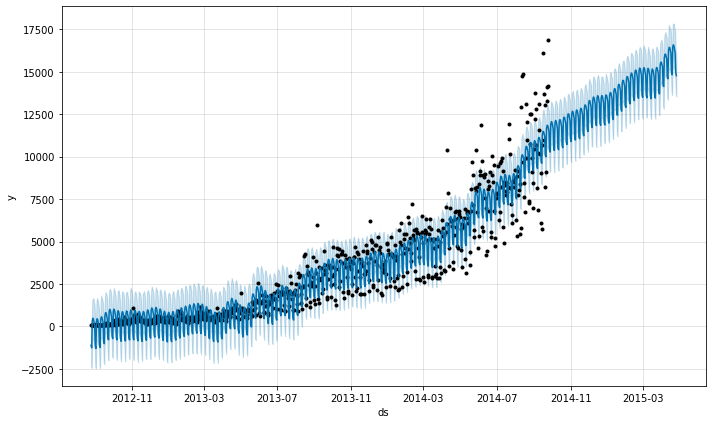

In [64]:
#print(df.tail())
# 拟合模型
model = Prophet(daily_seasonality=True,seasonality_prior_scale=0.1)
model.fit(df)

# 构建待预测日期数据框，periods = 213
future = model.make_future_dataframe(periods=213)
#print(future.tail())

# 预测数据集
forecast = model.predict(future)
#print(forecast.columns)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()

In [66]:
# 预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
#model.plot_components(forecast)
#print(forecast.columns)